# Projeto 1 - Ciência dos Dados

Nome: __Cauê Pileckas___

Nome: __Otávio Bianco___

Nome: __Victor Faria___

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re 
from unidecode import unidecode

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/cauedagostinho/Documents/Insper/2˚sem/Cdados/Projeto 1


### lista com palavras irrelevantes

## Colocar explicação bonitinha do pq essas palavras sao irrelevantes 

In [3]:
lista_index_out = ["a", "o", "que", "do", "da", "de", "em", "um", "para", "e", "com", "nao", "uma", "os", "no", "se", "na", "por",
    "mais", "as", "dos", "como", "mas", "foi", "ao", "ele", "das", "tem", "à", "seu", "sua", "ou", "ser", "quando",
    "muito", "ha", "nos", "ja", "esta", "eu", "também", "so", "pelo", "pela", "ate", "isso", "ela", "entre", "era",
    "depois", "sem", "mesmo", "aos", "ter", "seus", "quem", "nas", "me", "esse", "eles", "estao", "voce", "tinha",
    "foram", "essa", "num", "nem", "suas", "meu", "as", "minha", "numa", "pelos", "elas", "havia", "seja",
    "qual", "sera", "nos", "tenho", "lhe", "deles", "essas", "esses", "pelas", "este", "fosse", "dele", "tu", "te",
    "voces", "vos", "lhes", "meus", "minhas", "teu", "tua", "teus", "tuas", "nosso", "nossa", "nossos", "nossas",
    "dela", "delas", "esta", "estes", "estas", "aquele", "aquela", "aqueles", "aquelas", "isto", "aquilo", "estou",
    "esta", "estamos", "estao", "estive", "esteve", "estivemos", "estiveram", "estava", "estavamos", "estavam",
    "estivera", "estiveramos", "esteja", "estejamos", "estejam", "estivesse", "estivessemos", "estivessem", "estiver",
    "estivermos", "estiverem", "hei", "ha", "havemos", "hao", "houve", "houvemos", "houveram", "houvera",
    "houveramos", "haja", "hajamos", "hajam", "houvesse", "houvessemos", "houvessem", "houver", "houvermos",
    "houverem", "houverei", "houverá", "houveremos", "houverão", "houveria", "houveríamos", "houveriam", "sou",
    "somos", "sao", "era", "eramos", "eram", "fui", "foi", "fomos", "foram", "fora", "foramos", "seja", "sejamos",
    "sejam", "fosse", "fossemos", "fossem", "for", "formos", "forem", "serei", "sera", "seremos", "serao", "seria",
    "seriamos", "seriam", "tenho", "temos", "tem", "tinha", "tinhamos", "tinham", "tive", "teve", "tivemos",
    "tiveram", "tivera", "tiveramos", "tenha", "tenhamos", "tenham", "tivesse", "tivessemos", "tivessem", "tiver",
    "tivermos", "tiverem", "terei", "tera", "teremos", "terao", "teria", "teriamos", "teriam"]

Carregando a base de dados com os tweets classificados manualmente:

In [4]:
train = pd.read_excel('data/dados_treino.xlsx')
train

,Mensagem,Target
0,"Pelo menos no Livro 1 - A guerra dos tronos, a...",Conteúdo
1,Não gostei. O livro o tempo todo traz narrativ...,Conteúdo
2,"Ok, tem partes picantes legais, mas grande par...",Conteúdo
3,A estoria de amor entre duas pessoas psicologi...,Conteúdo
4,Péssimo livro. Ao mesmo tempo que tenta vanglo...,Conteúdo
...,...,...
495,"CLARO QUE AS ESTRELAS NÃO SÃO PAR A OBRA, MAS ...",Outros
496,Tenho muitos livros sobre a Segunda Guerra mun...,Conteúdo
497,Na época que estourou eu paguei 105 na edição ...,Conteúdo
498,Livro apenas comenta sobre o que é leitura ráp...,Outros


In [5]:
test = pd.read_excel('data/dados_teste.xlsx')
test

,Mensagem,Target
0,Um livro sensacional. Tenho aplicado o conceit...,Outros
1,A edição traz uma introdução que é puro spoile...,Conteúdo
2,É tão ruim quanto o canal dele.,Outros
3,É um livro baseado no fator motivacional e em ...,Conteúdo
4,"Olar, Frequentemente tendo sua marca, merecida...",Outros
...,...,...
245,Muito fraco e passional. Visão distorcida de d...,Outros
246,Nas primeiras páginas já temos o propósito do ...,Conteúdo
247,Achei um livro muito superficial e enfadonho. ...,Outros
248,"A menos que queira uma versão POCKET, não comp...",Outros


___
## Classificador automático


Faça aqui uma descrição do seu assunto e o que considerou como relevante ou não relevante na classificação dos reviews (Target).

##### CONTEÚDO:

Relevante: Reviews que abordam o enredo, personagens, temas, qualidade da escrita, análises críticas, recomendações, citações do livro, discussões sobre a trama, etc.
Não relevante: Reviews que não se relacionam ao conteúdo do livro, como anúncios de venda, spam, mensagens pessoais não relacionadas etc.

##### PRODUTO:

Relevante: Reviews que falam sobre a qualidade física do livro, como a capa, papel, encadernação, impressão, ilustrações, edições especiais, brindes, etc.
Não relevante: Reviews que não se referem à qualidade física do livro, como reviews promocionais da editora, anúncios de livros em geral, avaliações de transporte/demora de entrega, mensagens pessoais não relacionadas à qualidade física do livro, etc.

##### OUTROS: 

Relevante: Reviews que abordam temas gerais, não relacionados ao livro, mas que podem ser relevantes para os leitores, como dicas de leitura, eventos literários, escritores famosos, etc.
Não relevante: Reviews que não têm relação com o livro ou com interesses literários, como discussões sobre filmes, esportes, política, entre outros assuntos que não têm relevância para os critérios definidos.

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

### Criação das funções para tratamento da base de dados
##### Função cleanup: 
Antes de trabalharmos com nossa base de dados, é necessário estabelecermos alguns padrões para evitar posteriores ruídos que podem prejudircar a análise. Na função **cleanup** removemos alguns sinais de pontuação como aspas, apóstrofos, exclamações, hífens, pontos, dois-pontos, ponto e vírgula, ponto de interrogação e ponto de exclamação. Além de acentos e caracteres especiais do texto através da biblioteca **unicode**.
Por fim, o texto resultante foi convertido para letras minúsculas.

##### Função retorna_lista_mensagens:
Com as mensagens padronizadas e sem ruídos. Vamos iniciar a separação de dados para que possamos calcular as probabilidades posteriormente. Para isso a função **retorna_lista_mensagens** recebe o dataframe juntamente com uma das classificações do target. Com isso, nossa função itera pelas linhas da base de dados, separa as mensagens palavra a palavra criando uma lista que contém todas as palavras das mensagens que correspondem ao alvo especificado.

##### Função super_lista: 
A função **super_lista** itera pelo dataframe divindo as mensagens em palavras novamente e armazenando em uma nova lista. Em seguida a função verifica se alguma palavra pertence a lista de palavras colocadas na lista **lista_index_out** que representa as palavras que podem ser tiradas das mensagens por não representarem ou não darem indício sobre o target a que pertencem. Além disso, a função verifica se a palavra começa com "link" ou "http". Se a palavra atender a qualquer uma dessas condições, ela é removida da lista.  

In [6]:
def cleanup(text):
    """
        Função de limpeza muito simples que troca alguns sinais básicos por espaços
    """
    #import string
    punctuation = '[´"!-.:?;$'']' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    unidecode_text = unidecode(text_subbed)
    return unidecode_text.lower()

def retorna_lista_mensagens(df, target):
    lista_palavras_conteudo = []
    palavras_conteudo = []


    for index, row in df.iterrows():
        if row['Target'] == target:
            lista_palavras_conteudo.append(row['Mensagem'].split())
        
    for lista in lista_palavras_conteudo:
        for i in range(len(lista)):
            palavras_conteudo.append(lista[i])
            
    return palavras_conteudo

def super_lista(df):
    string = []
    for mensagem in df['Mensagem']:
        lista_com_mensagem = mensagem.split()

        for palavra in lista_com_mensagem:
            if palavra in lista_index_out:
                lista_com_mensagem.remove(palavra)
                
            elif palavra[:4] == 'link' or palavra[:4] == 'http':
                lista_com_mensagem.remove(palavra)

        for word in lista_com_mensagem:
            string.append(word)

    super_string = string
    return super_string

In [7]:
#Aplicando na base de dados treino a função cleanup
train['Mensagem'] = train['Mensagem'].apply(cleanup)

In [8]:
#Separando as mensagens por categoria do Target e encontrando suas frequências absolutas

# conteúdo -----
conteudo = train.loc[train['Target'] == 'Conteúdo']

# frequencia absoluta
conteudo_freq_abs = conteudo.value_counts()

# produto ------
produto = train.loc[train['Target'] == 'Produto']

# frequencia absoluta
produto_freq_abs = produto.value_counts()

# outros -------
outros = train.loc[train['Target'] == 'Outros']

# frequencia absoluta
outros_freq_abs = outros.value_counts()

### Tratando os dados em listas por categoria:
Com as funções de tratamento criadas e as mensagens separadas por categoria, vamos aplicá-las em cada categoria do nosso Target usando a nossa função **super_lista**.

In [9]:
# conteudo
str_conteudo = super_lista(conteudo)

# produto
str_produto = super_lista(produto)

# outros
str_outros = super_lista(outros)

### Agrupando todos os elementos para calcular a frequência relativa
Nessa etapa estamos criando novas listas com as listas das palavras de cada categoria. Em seguida, a partir da lista com todas as palavras criamos um Series no pandas.
Com essa série criada, podemos então calcular as frequências relativa e absoluta de cada palavra diante de todas as palavras. 

In [10]:
palavras_juntas = str_conteudo + str_produto + str_outros

serie_palavras_juntas = pd.Series(palavras_juntas)

# frequencia relativa de todas as palavras
palavras_juntas_rel_frame = serie_palavras_juntas.value_counts(normalize=True)

# frequencia absoluta de todas as palavras
palavras_juntas_frame = serie_palavras_juntas.value_counts()

In [11]:
# Criando uma lista que contém todas as palavras únicas presentes em todas as mensagens combinadas.
palavras_sem_repeticoes = list(set(palavras_juntas))

### Criando Series para cada categoria e suas frequências
Aqui criamos para cada categoria do nosso Target uma série do pandas.
Em seguida as frequências relativas e por fim as frequências absolutas.

In [12]:
serie_conteudo = pd.Series(str_conteudo)
serie_outros = pd.Series(str_outros)
serie_produto = pd.Series(str_produto)

# frequencia relativa por Target
df_conteudo_rel = serie_conteudo.value_counts(normalize=True)
df_outros_rel = serie_outros.value_counts(normalize=True)
df_produto_rel = serie_produto.value_counts(normalize=True)

# frequencia por "aparições"
df_conteudo_ap = serie_conteudo.value_counts()
df_outros_ap = serie_outros.value_counts()
df_produto_ap = serie_produto.value_counts()

### Calculando as probabilidades de uma mensagem pertencer à cada categoria

In [13]:
prob_conteudo = len(serie_conteudo) / len(serie_palavras_juntas)
prob_outros = len(serie_outros)   / len(serie_palavras_juntas)
prob_produto = len(serie_produto) / len(serie_palavras_juntas)

# O que é um suavizador de laplace

### Criando funções para o cálculo da probabilidade condicional

Vistos os conceitos de probabilidade condicional do Teorema de Bayes e o suavizador de Laplace, vamos calcular as probabilidades condicionais de cada palavra e aplicar o algoritmo de Laplace para evitar que alguma probabilidade se torne zero caso não esteja no nosso dataframe trabalhado.

##### Função Laplace: 
A função leva como entrada a palavra em questão, a categoria alvo, a frequência absoluta das palavras na categoria alvo e uma lista de palavras únicas em todas as mensagens. Utiliza esses valores para calcular a probabilidade condicional suavizada da palavra na categoria alvo, seguindo o método de Laplace. O resultado é a probabilidade de uma palavra ocorrer na categoria alvo, levando em consideração o contexto e a suavização para evitar valores zero.

##### Função Condicional:
Nesta função foi calculada a probabilidade condicional, através dos conceitos do Teorema de Bayes, dado uma categoria alvo a partir de uma mensagem e aplicando a suavização de Laplace criada na função acima.

##### Função Classificador:
A função **Classificador** determina, baseado nos valores das probabilidades das funções anteriores, a categoria com a maior probabilidade condicional como a classificação para o feedback fornecido.

In [14]:
# criação do suavizador para tratar a probabilidade + aquelas palavras que não tiverem no banco de dados
def Laplace(palavra, target, frequencia_absoluta, palavras_sem_repeticao):
    freq_total = 1
    resultado = 0
    
    if palavra in frequencia_absoluta:
        freq_abs = frequencia_absoluta[palavra]
    else:
        freq_abs = 0
    
    if target == 'Conteúdo':
        laplace = (freq_abs + freq_total) / (len(str_conteudo) + freq_total * len(palavras_sem_repeticoes))
        
    elif target == 'Outros':
        laplace = (freq_abs + freq_total) / (len(str_outros) + freq_total * len(palavras_sem_repeticoes))
        
    elif target == 'Produto':
        laplace = (freq_abs + freq_total) / (len(str_produto) + freq_total * len(palavras_sem_repeticoes))

        
    return laplace

def Condicional(target, feedback):
    
    if target == 'Conteúdo':
        prob_feedback_dado_conteudo = 1
        
        for palavra in feedback.split():
            prob_feedback_dado_conteudo *= Laplace(palavra, target, df_conteudo_ap, palavras_sem_repeticoes)
            
        prob_conteudo_dado_feedback = prob_conteudo * prob_feedback_dado_conteudo
        return prob_conteudo_dado_feedback
    
    elif target == 'Outros':
        prob_feedback_dado_outros = 1
        
        for palavra in feedback.split():
            prob_feedback_dado_outros *= Laplace(palavra, target, df_outros_ap, palavras_sem_repeticoes)
            
        prob_outros_dado_feedback = prob_outros * prob_feedback_dado_outros
        return prob_outros_dado_feedback
    
    elif target == 'Produto':
        prob_feedback_dado_produto = 1
        
        for palavra in feedback.split():
            prob_feedback_dado_produto *= Laplace(palavra, target, df_produto_ap, palavras_sem_repeticoes)
            
        prob_produto_dado_feedback = prob_produto * prob_feedback_dado_produto
        return prob_produto_dado_feedback
    
def Classificador(feedback):
    if Condicional('Conteúdo', feedback) == max([Condicional('Conteúdo', feedback), Condicional('Outros', feedback), Condicional('Produto', feedback)]):
        return 'Conteúdo'
    
    elif Condicional('Outros', feedback) == max([Condicional('Conteúdo', feedback), Condicional('Outros', feedback), Condicional('Produto', feedback)]):
        return 'Outros'
    
    elif Condicional('Produto', feedback) == max([Condicional('Conteúdo', feedback), Condicional('Outros', feedback), Condicional('Produto', feedback)]):
        return 'Produto'

## Aplicando a análise na base de dados "Train"


In [15]:
#Fazendo o uso da última função criada, aplica-se a classificação das mensagens e guarda-as em uma nova coluna 'Robot'
train['Robot'] = train['Mensagem'].apply(Classificador)

In [16]:
train

,Mensagem,Target,Robot
0,pelo menos no livro 1 a guerra dos tronos a t...,Conteúdo,Conteúdo
1,nao gostei o livro o tempo todo traz narrativa...,Conteúdo,Conteúdo
2,ok tem partes picantes legais mas grande parte...,Conteúdo,Conteúdo
3,a estoria de amor entre duas pessoas psicologi...,Conteúdo,Conteúdo
4,pessimo livro ao mesmo tempo que tenta vanglor...,Conteúdo,Conteúdo
...,...,...,...
495,claro que as estrelas nao sao par a obra mas p...,Outros,Outros
496,tenho muitos livros sobre a segunda guerra mun...,Conteúdo,Conteúdo
497,na epoca que estourou eu paguei 105 na edicao ...,Conteúdo,Conteúdo
498,livro apenas comenta sobre o que e leitura rap...,Outros,Outros


___
## Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

### Verificando inicialmente com "crosstab"

In [17]:
#tabela = pd.crosstab(df_teste['Target'], df_teste['Robot'])
tabela = pd.crosstab(train['Robot'], train['Target'], normalize='index', margins=True)
tabela = tabela*100
tabela

Target,Conteúdo,Outros,Produto
Robot,,,
Conteúdo,74.509804,14.845938,10.644258
Outros,2.439024,91.056911,6.504065
Produto,0.000000,0.000000,100.000000
All,53.800000,33.000000,13.200000


### Encontrando percentuais de Falsos Targets e Verdadeiros Targets

In [18]:
percent_verdadeiros_cont = len(train.loc[(train['Robot'] == 'Conteúdo') & (train['Target'] == 'Conteúdo')]) / len(train.loc[(train['Robot'] == 'Conteúdo')])
percent_falsos_cont = len(train.loc[(train['Robot'] == 'Conteúdo') & (train['Target'] != 'Conteúdo')]) / len(train.loc[(train['Robot'] == 'Conteúdo')])

percent_verdadeiros_prod = len(train.loc[(train['Robot'] == 'Produto') & (train['Target'] == 'Produto')]) / len(train.loc[(train['Robot'] == 'Produto')])
percent_falsos_prod = len(train.loc[(train['Robot'] == 'Produto') & (train['Target'] != 'Produto')]) / len(train.loc[(train['Robot'] == 'Produto')])

percent_verdadeiros_outros = len(train.loc[(train['Robot'] == 'Outros') & (train['Target'] == 'Outros')]) / len(train.loc[(train['Robot'] == 'Outros')])
percent_falsos_outros = len(train.loc[(train['Robot'] == 'Outros') & (train['Target'] != 'Outros')]) / len(train.loc[(train['Robot'] == 'Outros')])

print(f'Verdadeiros "Conteúdo": {percent_verdadeiros_cont*100:.2f}%  | Falsos "Conteúdo": {percent_falsos_cont*100:.2f}%')
print(f'Verdadeiros "Produto": {percent_verdadeiros_prod*100:.2f}%  | Falsos "Produto": {percent_falsos_prod*100:.2f}%')
print(f'Verdadeiros "Outros": {percent_verdadeiros_outros*100:.2f}%    | Falsos "Outros": {percent_falsos_outros*100:.2f}%')

Verdadeiros "Conteúdo": 74.51%  | Falsos "Conteúdo": 25.49%
Verdadeiros "Produto": 100.00%  | Falsos "Produto": 0.00%
Verdadeiros "Outros": 91.06%    | Falsos "Outros": 8.94%


### Encontrando a acurácia do robô criado para a base de dados "Train"

In [19]:
df_acuracia = train.copy()

In [20]:
df_acuracia.loc[df_acuracia['Target'] == df_acuracia['Robot'], 'Acuracia'] = 1
df_acuracia['Acuracia_sum'] = df_acuracia['Acuracia'].sum()

acuracia = (df_acuracia['Acuracia_sum']).values[-1]
acuracia_percent = (acuracia / len(df_acuracia)) * 100

print(f'Acurácia do robô: {acuracia} mensagens classficadas correntamente, equivalente a {acuracia_percent:.2f}% das mensagens')

Acurácia do robô: 398.0 mensagens classficadas correntamente, equivalente a 79.60% das mensagens


# Repetindo o processo para base de dados "Test"

In [21]:
test['Robot'] = test['Mensagem'].apply(Classificador)

In [22]:
test

,Mensagem,Target,Robot
0,Um livro sensacional. Tenho aplicado o conceit...,Outros,Produto
1,A edição traz uma introdução que é puro spoile...,Conteúdo,Produto
2,É tão ruim quanto o canal dele.,Outros,Outros
3,É um livro baseado no fator motivacional e em ...,Conteúdo,Conteúdo
4,"Olar, Frequentemente tendo sua marca, merecida...",Outros,Conteúdo
...,...,...,...
245,Muito fraco e passional. Visão distorcida de d...,Outros,Produto
246,Nas primeiras páginas já temos o propósito do ...,Conteúdo,Produto
247,Achei um livro muito superficial e enfadonho. ...,Outros,Conteúdo
248,"A menos que queira uma versão POCKET, não comp...",Outros,Produto


### Verificando a performance com "crosstab"

In [23]:
tabela = pd.crosstab(test['Robot'], test['Target'], normalize='index', margins=True)
tabela = tabela*100
tabela

Target,Conteúdo,Outros,Produto
Robot,,,
Conteúdo,65.625000,26.562500,7.812500
Outros,36.666667,45.000000,18.333333
Produto,41.935484,33.870968,24.193548
All,52.800000,32.800000,14.400000


### Encontrando percentuais de Falsos Targets e Verdadeiros Targets

In [24]:
percent_verdadeiros_cont = len(test.loc[(test['Robot'] == 'Conteúdo') & (test['Target'] == 'Conteúdo')]) / len(test.loc[(test['Robot'] == 'Conteúdo')])
percent_falsos_cont = len(test.loc[(test['Robot'] == 'Conteúdo') & (test['Target'] != 'Conteúdo')]) / len(test.loc[(test['Robot'] == 'Conteúdo')])

percent_verdadeiros_prod = len(test.loc[(test['Robot'] == 'Produto') & (test['Target'] == 'Produto')]) / len(test.loc[(test['Robot'] == 'Produto')])
percent_falsos_prod = len(test.loc[(test['Robot'] == 'Produto') & (test['Target'] != 'Produto')]) / len(test.loc[(test['Robot'] == 'Produto')])

percent_verdadeiros_outros = len(test.loc[(test['Robot'] == 'Outros') & (test['Target'] == 'Outros')]) / len(test.loc[(test['Robot'] == 'Outros')])
percent_falsos_outros = len(test.loc[(test['Robot'] == 'Outros') & (test['Target'] != 'Outros')]) / len(test.loc[(test['Robot'] == 'Outros')])

print(f'Verdadeiros "Conteúdo": {percent_verdadeiros_cont*100:.2f}%  | Falsos "Conteúdo": {percent_falsos_cont*100:.2f}%')
print(f'Verdadeiros "Produto": {percent_verdadeiros_prod*100:.2f}%   | Falsos "Produto": {percent_falsos_prod*100:.2f}%')
print(f'Verdadeiros "Outros": {percent_verdadeiros_outros*100:.2f}%    | Falsos "Outros": {percent_falsos_outros*100:.2f}%')

Verdadeiros "Conteúdo": 65.62%  | Falsos "Conteúdo": 34.38%
Verdadeiros "Produto": 24.19%   | Falsos "Produto": 75.81%
Verdadeiros "Outros": 45.00%    | Falsos "Outros": 55.00%


In [25]:
df_acuracia = test.copy()

In [26]:
df_acuracia.loc[df_acuracia['Target'] == df_acuracia['Robot'], 'Acuracia'] = 1
df_acuracia['Acuracia_sum'] = df_acuracia['Acuracia'].sum()

acuracia = (df_acuracia['Acuracia_sum']).values[-1]
acuracia_percent = (acuracia / len(df_acuracia)) * 100

print(f'Acurácia do robô: {acuracia} mensagens classificadas corretamente, equivalente a {acuracia_percent:.2f}% das mensagens')

Acurácia do robô: 126.0 mensagens classificadas corretamente, equivalente a 50.40% das mensagens


## Conclusão

O classificador criado aqui que tinha como objetivo classificar reviews de livros obteve uma acurácia de 50.40%. A porcentagem de classificações verdadeiras para a categoria "Conteúdo" foi de 65.62%, para a categoria "Produto" 24.19% e para "Outros" 45.00%. De forma complementar a esses valores, as porcentagens de classficações falsas para "Conteúdo", "Produto" e "Outros" foram respectivamente 34.38%, 75.81%, 55.00%. 

### Comparativo qualitativo sobre os percentuais obtidos
Na base de dados de treinamento do classificador, a acurácia foi significativamente mais alta (79.60%) em comparação com a base de dados de teste (50.40%). Fato que já era esperado, isso aconteceu porque o classificador foi treinado na primeira base de dados, portanto tinha menos ruídos e palavras "desconhecidas" em comparação com a base de dados teste.<br>
Na primeira base de dados, o classificador apresentou taxas muito boas de verdadeiros positivos para todas as categorias.
Já na segunda base de dados, embora a taxa de verdadeiros positivos para a categoria "Conteúdo" (65.62%) tenha sido próxima da taxa encontrada na base de dados treino (74.51%), as taxas para as categorias "Produto" (24.19%) e "Outros" (45.00%) foram consideravelmente mais baixas, indicando uma capacidade limitada de identificar com precisão essas categorias.<br>
Para os falsos positivos, as taxas apresentadas para as categorias "Produto" (75.81%) e "Outros" (55.00%) no dataframe teste indica que o classificador apresenta mais dificuldade em classificar mensagens nessas categorias.

### Demonstração se tratando de sarcasmo
A simplicidade do algoritmo Naive Bayes reside em sua análise de palavras de forma independente, justamente por isso leva o nome "Naive" como mencionado acima, desconsiderando, assim, o contexto das frases. Nesse sentido, o classificador é incapaz de tratar esse tipo de contexto já que depende da combinação de duas ou mais palavras, do contexto em que está inserida e portanto vai além da análise estritamente sintática. 

In [27]:
string = 'oh claro porque esperar que as coisas acontecam por si mesmas sempre deu tao certo'

classificacao_robot = Classificador(string)

print(f'Classificação do Robô: {classificacao_robot}')

Classificação do Robô: Conteúdo


### Demonstração se tratando de dupla negação
Da mesma forma como ocorre na demonstração de sarcasmo, pelas características do classficador Naive-Bayes, o algoritmo é incapaz de interpretar uma dupla negação com um significado positivo.

In [28]:
string = 'o autor nao esta nao escrevendo diversos assuntos iguais'

classificacao_robot = Classificador(string)

print(f'Classificação do Robô: {classificacao_robot}')

Classificação do Robô: Conteúdo


### Diferentes cenários de uso para o classificador Naive-Bayes
O classficador Naive-Bayes pode ser usado em diversos setores e atividades diferentes. Algumas possíveis situações em que o classificador seria útil:
- Classificação de notícias, o Naive Bayes pode ser usado para categorizar notícias em diferentes seções, como política, esportes, entretenimento, entre outras.
- Classificação de capítulos de livros, o algoritmo pode analisar as palavras do título de cada capítulo de um livro didático e classifica-los por assunto.
- Remoção de mensagens com linguagem ofensiva, poderia ser aplicado em redes sociais e fóruns para identificar posts e mensagens que contenham linguagem ofensiva ou discurso de ódio.

### Possíveis melhorias no classificador

# TERMINAR 



### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Caso for fazer esse item do Projeto

In [29]:
df_treino = train
df_teste = test
for index, row in df_treino.iterrows():
    lista_feedback = (row['Mensagem'].split())
    
    for palavra in lista_feedback:
        if palavra in lista_index_out:
            lista_feedback.remove(palavra)
    
    feedback = " ".join(lista_feedback)
    
    row['Mensagem'] = feedback

for index, row in df_teste.iterrows():
    lista_feedback2 = (row['Mensagem'].split())
    
    for palavra2 in lista_feedback2:
        if palavra2 in lista_index_out:
            lista_feedback2.remove(palavra2)
    
    feedback2 = " ".join(lista_feedback2)
    
    row['Mensagem'] = feedback2



In [30]:
df_total = pd.concat([df_teste, df_treino], ignore_index=True)

repeticoes = 100
new_data_accurency = []

verdadeiro_conteudo = []
falso_conteudo = []

verdadeiro_produto = []
falso_produto = []

verdadeiro_outros = []
falso_outros = []


for i in range(repeticoes):
    # Embaralhando as linhas do DataFrame
    df_embaralhado = df_total.sample(frac=1).reset_index(drop=True)
    
    # Divida o DataFrame em duas partes: 500 e 250 linhas
    parte1 = df_embaralhado[:500].copy()
    parte2 = df_embaralhado[500:750].copy()
    
    conteudo = parte1.loc[train['Target'] == 'Conteúdo']
    conteudo_freq_abs = conteudo.value_counts()
    produto = parte1.loc[parte1['Target'] == 'Produto']
    produto_freq_abs = produto.value_counts()
    outros = parte1.loc[parte1['Target'] == 'Outros']
    outros_freq_abs = outros.value_counts()
    str_conteudo = super_lista(conteudo)
    str_produto = super_lista(produto)
    str_outros = super_lista(outros)
    palavras_juntas = str_conteudo + str_produto + str_outros
    serie_palavras_juntas = pd.Series(palavras_juntas)
    palavras_juntas_rel_frame = serie_palavras_juntas.value_counts(normalize=True)
    palavras_juntas_frame = serie_palavras_juntas.value_counts()
    
    palavras_sem_repeticoes = list(set(palavras_juntas))
    
    serie_conteudo = pd.Series(str_conteudo)
    serie_outros = pd.Series(str_outros)
    serie_produto = pd.Series(str_produto)

    # frequencia relativa por Target
    df_conteudo_rel = serie_conteudo.value_counts(normalize=True)
    df_outros_rel = serie_outros.value_counts(normalize=True)
    df_produto_rel = serie_produto.value_counts(normalize=True)

    # frequencia por "aparições"
    df_conteudo_ap = serie_conteudo.value_counts()
    df_outros_ap = serie_outros.value_counts()
    df_produto_ap = serie_produto.value_counts()
    
    prob_conteudo = len(serie_conteudo) / len(serie_palavras_juntas)
    prob_outros = len(serie_outros)   / len(serie_palavras_juntas)
    prob_produto = len(serie_produto) / len(serie_palavras_juntas)
    
    parte2.loc[:, 'Robot'] = parte2['Mensagem'].apply(Classificador)
    len_parte2 = len(parte2)
    
    # acurácia
    len_acuracia = len(parte2.loc[parte2['Robot'] == parte2['Target']])
    acuracia_percent = (len_acuracia / len_parte2) * 100
    new_data_accurency.append(acuracia_percent)
    
    # conteúdo
    len_acerto_conteudo = len(parte2.loc[(parte2['Robot'] == 'Conteúdo') & (parte2['Target'] == 'Conteúdo')])
    len_erro_conteudo = len(parte2.loc[(parte2['Robot'] == 'Conteúdo') & (parte2['Target'] != 'Conteúdo')])
    len_conteudo = len(parte2.loc[(parte2['Robot'] == 'Conteúdo')])

    conteudo_acerto_percent = (len_acerto_conteudo / len_conteudo) * 100
    conteudo_erro_percent = (len_erro_conteudo / len_conteudo) * 100
    
    verdadeiro_conteudo.append(conteudo_acerto_percent)
    falso_conteudo.append(conteudo_erro_percent)

    
    # produto
    len_acerto_produto = len(parte2.loc[(parte2['Robot'] == 'Produto') & (parte2['Target'] == 'Produto')])
    len_erro_produto = len(parte2.loc[(parte2['Robot'] == 'Produto') & (parte2['Target'] != 'Produto')])
    len_produto = len(parte2.loc[(parte2['Robot'] == 'Produto')])

    produto_acerto_percent = (len_acerto_produto / len_produto) * 100
    produto_erro_percent = (len_erro_produto / len_produto) * 100
    
    verdadeiro_produto.append(produto_acerto_percent)
    falso_produto.append(produto_erro_percent)
    
    
    # outros
    len_acerto_outros = len(parte2.loc[(parte2['Robot'] == 'Outros') & (parte2['Target'] == 'Outros')])
    len_erro_outros = len(parte2.loc[(parte2['Robot'] == 'Outros') & (parte2['Target'] != 'Outros')])
    len_outros = len(parte2.loc[(parte2['Robot'] == 'Outros')])
    
    outros_acerto_percent = (len_acerto_outros / len_outros) * 100
    outros_erro_percent = (len_erro_outros / len_outros) * 100
    
    verdadeiro_outros.append(outros_acerto_percent)
    falso_outros.append(outros_erro_percent)

### Construindo Histogramas - Acurácia

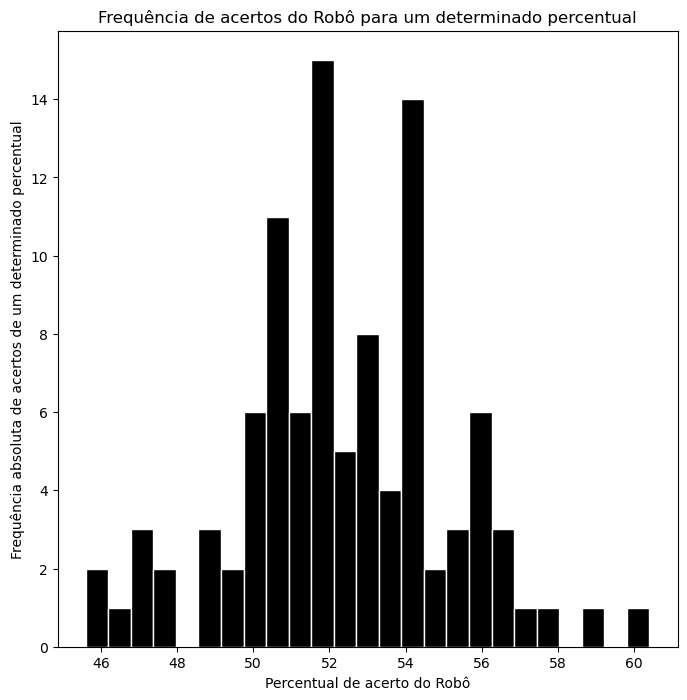

In [39]:
plt.figure(figsize=(8, 8))

plt.subplot(111)
plt.hist(new_data_accurency, bins=25, edgecolor='white', color='black')
plt.xlabel('Percentual de acerto do Robô')
plt.ylabel('Frequência absoluta de acertos de um determinado percentual')
plt.title('Frequência de acertos do Robô para um determinado percentual')
plt.show()

### Construindo Histogramas - Produto

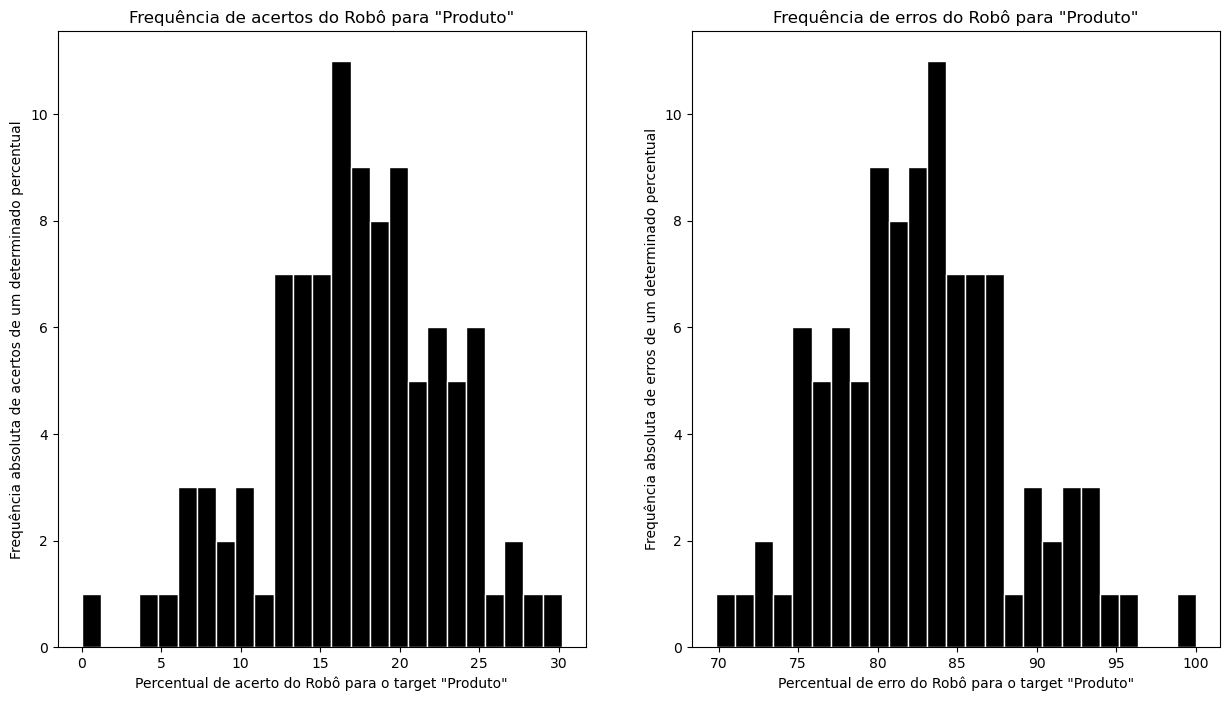

In [38]:
plt.figure(figsize=(15, 8))

plt.subplot(121)
plt.hist(verdadeiro_produto, bins=25, edgecolor='white', color='black')
plt.xlabel('Percentual de acerto do Robô para o target "Produto"')
plt.ylabel('Frequência absoluta de acertos de um determinado percentual')
plt.title('Frequência de acertos do Robô para "Produto"')

plt.subplot(122)
plt.hist(falso_produto, bins=25, edgecolor='white', color='black')
plt.xlabel('Percentual de erro do Robô para o target "Produto"')
plt.ylabel('Frequência absoluta de erros de um determinado percentual')
plt.title('Frequência de erros do Robô para "Produto"')
plt.show()

___
## Aperfeiçoamento:

Trabalhos que conseguirem pelo menos conceito B vão evoluir em conceito dependendo da quantidade de itens avançados:

* IMPLEMENTOU outras limpezas e transformações que não afetem a qualidade da informação contida nos tweets. Ex: stemming, lemmatization, stopwords
* CONSIDEROU mais de duas categorias na variável Target e INCREMENTOU a quantidade de notícias, mantendo pelo menos 250 notícias por categoria (OBRIGATÓRIO PARA TRIOS, sem contar como item avançado)
* Para Target com duas categorias: CRIOU pelo menos quatro categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante
* EXPLICOU porquê não pode usar o próprio classificador para gerar mais amostras de treinamento
* PROPÔS diferentes cenários para Naïve Bayes fora do contexto do projeto (pelo menos dois cenários, exceto aqueles já apresentados em sala pelos professores: por exemplo, filtro de spam)
* SUGERIU e EXPLICOU melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* FEZ o item Qualidade do Classificador a partir de novas separações das Notícias entre Treinamento e Teste descrito no enunciado do projeto (OBRIGATÓRIO para conceitos A ou A+)

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**